# Neural Networks image recognition - ConvNet

1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data. **
2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 
3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.
4. Compare these results with the previous week where we used a MultiLayer Perceptron (this week we use a ConvNet). 

# Neural Networks - Image Recognition 

In [6]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Conv Net
Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).


In [2]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
batch_size = 128
num_classes = 10
epochs = 12

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
469/469 [==============================] - 84s 176ms/step - loss: 2.2802 - accuracy: 0.1639 - val_loss: 2.2400 - val_accuracy: 0.3622
Epoch 2/12
469/469 [==============================] - 84s 180ms/step - loss: 2.2157 - accuracy: 0.3035 - val_loss: 2.1615 - val_accuracy: 0.6048
Epoch 3/12
469/469 [==============================] - 90s 191ms/step - loss: 2.1340 - accuracy: 0.4169 - val_loss: 2.0587 - val_accuracy: 0.6683
Epoch 4/12
469/469 [==============================] - 89s 190ms/step - loss: 2.0252 - accuracy: 0.4929 - val_loss: 1.9185 - val_accuracy: 0.7101
Epoch 5/12
469/469 [==============================] - 89s 190ms/step - loss: 1.8813 - accuracy: 0.5465 - val_loss: 1.7339 - val_accuracy: 0.7427
Epoch 6/12
469/469 [==============================] - 82s 175ms/step - loss: 1.7060 - accuracy: 0.5843 - val_loss: 1.5191 - val_accuracy: 0.7683
Epoch 7/12
469/469 [==============================] - 86s 183ms/step - loss: 1.5172 - accuracy: 0.6185 - val_loss: 1.3035 - val_ac

In [38]:
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [39]:
noisetrain = np.random.normal(loc = 0, scale = .1, size = [60000, 28, 28, 1])
noisetest = np.random.normal(loc = 0,scale = .1,size = [10000, 28, 28, 1])
noisy_train = noisetrain + x_train
noisy_test = noisetest + x_test

In [40]:
batch_size = 128
num_classes = 10
epochs = 12

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3),
                 activation = 'relu',
                 input_shape = input_shape))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.Adadelta(),
              metrics = ['accuracy'])

model.fit(noisy_train, y_train,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 1,
          validation_data = (noisy_test, y_test))
score = model.evaluate(noisy_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
score5 = score[1]

#Not as accurate as no noise but still accurate enough and more accurate than the Multilayer Perception

Epoch 1/12
469/469 [==============================] - 74s 156ms/step - loss: 2.2783 - accuracy: 0.1420 - val_loss: 2.2376 - val_accuracy: 0.2540
Epoch 2/12
469/469 [==============================] - 78s 166ms/step - loss: 2.2149 - accuracy: 0.2513 - val_loss: 2.1569 - val_accuracy: 0.5037
Epoch 3/12
469/469 [==============================] - 81s 174ms/step - loss: 2.1307 - accuracy: 0.3645 - val_loss: 2.0475 - val_accuracy: 0.6368
Epoch 4/12
469/469 [==============================] - 74s 158ms/step - loss: 2.0188 - accuracy: 0.4559 - val_loss: 1.9010 - val_accuracy: 0.7135
Epoch 5/12
469/469 [==============================] - 86s 184ms/step - loss: 1.8721 - accuracy: 0.5243 - val_loss: 1.7158 - val_accuracy: 0.7487
Epoch 6/12
469/469 [==============================] - 77s 165ms/step - loss: 1.6997 - accuracy: 0.5747 - val_loss: 1.5065 - val_accuracy: 0.7765
Epoch 7/12
469/469 [==============================] - 78s 165ms/step - loss: 1.5190 - accuracy: 0.6084 - val_loss: 1.2978 - val_ac

In [21]:
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [22]:
noisetrain1 = np.random.normal(loc = 0, scale = .5, size = [60000, 28, 28, 1])
noisetest1 = np.random.normal(loc = 0,scale = .5,size = [10000, 28, 28, 1])
noisy_train1 = noisetrain1 + x_train
noisy_test1 = noisetest1 + x_test

In [23]:
batch_size = 128
num_classes = 10
epochs = 12

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3),
                 activation = 'relu',
                 input_shape = input_shape))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.Adadelta(),
              metrics = ['accuracy'])

model.fit(noisy_train1, y_train,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 1,
          validation_data = (noisy_test1, y_test))
score = model.evaluate(noisy_test1, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
score1 = score[1]

Epoch 1/12
469/469 [==============================] - 76s 159ms/step - loss: 2.3000 - accuracy: 0.1133 - val_loss: 2.2641 - val_accuracy: 0.2462
Epoch 2/12
469/469 [==============================] - 75s 160ms/step - loss: 2.2649 - accuracy: 0.1625 - val_loss: 2.2270 - val_accuracy: 0.3976
Epoch 3/12
469/469 [==============================] - 74s 158ms/step - loss: 2.2316 - accuracy: 0.2038 - val_loss: 2.1862 - val_accuracy: 0.4805
Epoch 4/12
469/469 [==============================] - 74s 158ms/step - loss: 2.1944 - accuracy: 0.2423 - val_loss: 2.1377 - val_accuracy: 0.5468
Epoch 5/12
469/469 [==============================] - 74s 157ms/step - loss: 2.1495 - accuracy: 0.2812 - val_loss: 2.0784 - val_accuracy: 0.5990
Epoch 6/12
469/469 [==============================] - 71s 152ms/step - loss: 2.0945 - accuracy: 0.3227 - val_loss: 2.0066 - val_accuracy: 0.6463
Epoch 7/12
469/469 [==============================] - 73s 155ms/step - loss: 2.0292 - accuracy: 0.3647 - val_loss: 1.9221 - val_ac

In [24]:
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [25]:
noisetrain2 = np.random.normal(loc = 0, scale = 1, size = [60000, 28, 28, 1])
noisetest2 = np.random.normal(loc = 0,scale = 1,size = [10000, 28, 28, 1])
noisy_train2 = noisetrain2 + x_train
noisy_test2 = noisetest2 + x_test

In [26]:
batch_size = 128
num_classes = 10
epochs = 12

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3),
                 activation = 'relu',
                 input_shape = input_shape))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.Adadelta(),
              metrics = ['accuracy'])

model.fit(noisy_train2, y_train,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 1,
          validation_data = (noisy_test2, y_test))
score = model.evaluate(noisy_test2, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
score2 = score[1]

Epoch 1/12
469/469 [==============================] - 74s 156ms/step - loss: 2.3396 - accuracy: 0.0997 - val_loss: 2.2966 - val_accuracy: 0.1188
Epoch 2/12
469/469 [==============================] - 72s 153ms/step - loss: 2.3078 - accuracy: 0.1162 - val_loss: 2.2805 - val_accuracy: 0.1648
Epoch 3/12
469/469 [==============================] - 68s 145ms/step - loss: 2.2918 - accuracy: 0.1285 - val_loss: 2.2678 - val_accuracy: 0.2073
Epoch 4/12
469/469 [==============================] - 74s 157ms/step - loss: 2.2803 - accuracy: 0.1424 - val_loss: 2.2544 - val_accuracy: 0.2424
Epoch 5/12
469/469 [==============================] - 80s 172ms/step - loss: 2.2680 - accuracy: 0.1531 - val_loss: 2.2390 - val_accuracy: 0.2817
Epoch 6/12
469/469 [==============================] - 82s 175ms/step - loss: 2.2536 - accuracy: 0.1702 - val_loss: 2.2192 - val_accuracy: 0.3256
Epoch 7/12
469/469 [==============================] - 84s 178ms/step - loss: 2.2378 - accuracy: 0.1853 - val_loss: 2.1962 - val_ac

In [27]:
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [28]:
noisetrain3 = np.random.normal(loc = 0, scale = 2, size = [60000, 28, 28, 1])
noisetest3 = np.random.normal(loc = 0,scale = 2,size = [10000, 28, 28, 1])
noisy_train3 = noisetrain3 + x_train
noisy_test3 = noisetest3 + x_test

In [29]:
batch_size = 128
num_classes = 10
epochs = 12

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3),
                 activation = 'relu',
                 input_shape = input_shape))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.Adadelta(),
              metrics = ['accuracy'])

model.fit(noisy_train3, y_train,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 1,
          validation_data = (noisy_test3, y_test))
score = model.evaluate(noisy_test3, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
score3 = score[1]

Epoch 1/12
469/469 [==============================] - 74s 155ms/step - loss: 2.4264 - accuracy: 0.1033 - val_loss: 2.3098 - val_accuracy: 0.1086
Epoch 2/12
469/469 [==============================] - 78s 165ms/step - loss: 2.3413 - accuracy: 0.1034 - val_loss: 2.3001 - val_accuracy: 0.1141
Epoch 3/12
469/469 [==============================] - 75s 159ms/step - loss: 2.3170 - accuracy: 0.1068 - val_loss: 2.2975 - val_accuracy: 0.1188
Epoch 4/12
469/469 [==============================] - 86s 184ms/step - loss: 2.3072 - accuracy: 0.1112 - val_loss: 2.2966 - val_accuracy: 0.1307
Epoch 5/12
469/469 [==============================] - 79s 167ms/step - loss: 2.3031 - accuracy: 0.1131 - val_loss: 2.2963 - val_accuracy: 0.1366
Epoch 6/12
469/469 [==============================] - 67s 143ms/step - loss: 2.3008 - accuracy: 0.1158 - val_loss: 2.2956 - val_accuracy: 0.1378
Epoch 7/12
469/469 [==============================] - 73s 156ms/step - loss: 2.2987 - accuracy: 0.1199 - val_loss: 2.2948 - val_ac

In [30]:
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [31]:
noisetrain4 = np.random.normal(loc = 0, scale = 4, size = [60000, 28, 28, 1])
noisetest4 = np.random.normal(loc = 0, scale = 4,size = [10000, 28, 28, 1])
noisy_train4 = noisetrain4 + x_train
noisy_test4 = noisetest4 + x_test

In [32]:
batch_size = 128
num_classes = 10
epochs = 12

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3),
                 activation = 'relu',
                 input_shape = input_shape))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.Adadelta(),
              metrics = ['accuracy'])

model.fit(noisy_train4, y_train,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 1,
          validation_data = (noisy_test4, y_test))
score = model.evaluate(noisy_test4, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
score4 = score[1]

Epoch 1/12
469/469 [==============================] - 69s 146ms/step - loss: 2.5833 - accuracy: 0.1003 - val_loss: 2.3177 - val_accuracy: 0.1011
Epoch 2/12
469/469 [==============================] - 70s 149ms/step - loss: 2.3734 - accuracy: 0.1024 - val_loss: 2.3045 - val_accuracy: 0.1065
Epoch 3/12
469/469 [==============================] - 74s 158ms/step - loss: 2.3265 - accuracy: 0.1013 - val_loss: 2.3027 - val_accuracy: 0.1041
Epoch 4/12
469/469 [==============================] - 75s 159ms/step - loss: 2.3143 - accuracy: 0.1024 - val_loss: 2.3025 - val_accuracy: 0.1036
Epoch 5/12
469/469 [==============================] - 82s 175ms/step - loss: 2.3080 - accuracy: 0.0998 - val_loss: 2.3024 - val_accuracy: 0.1107
Epoch 6/12
469/469 [==============================] - 76s 161ms/step - loss: 2.3071 - accuracy: 0.1035 - val_loss: 2.3024 - val_accuracy: 0.1119
Epoch 7/12
469/469 [==============================] - 78s 167ms/step - loss: 2.3059 - accuracy: 0.1066 - val_loss: 2.3023 - val_ac

In [43]:
all_scores = [score5, score1, score2, score3, score4]
all_scores
all_scales = [0.1, 0.5, 1, 2 ,4]

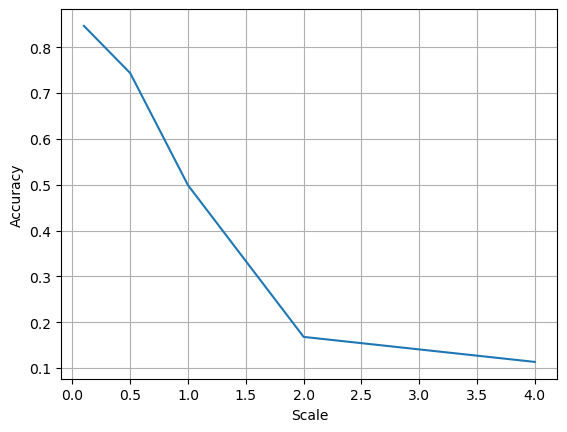

In [44]:
plt.figure()
plt.plot(all_scales, all_scores)
plt.xlabel('Scale')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Last week we saw that accuracy didn't only decrease with the scale. We saw a massive increase at scale 1. We are noticing
# this week with Convnet that as scale increases, accuracy decreases.